# Interactive Demo

## DMAP: A Distribution Map for Text

**Welcome!** This notebook is a hands‑on tour of DMAP— the Distribution Map that converts a text, via a language model, into samples on the unit interval [0, 1] that jointly encode rank and probability information. The result is a compact, model‑agnostic representation you can visualize, compare, and test statistically.

Think of DMAP as a “probability microscope” for text: instead of looking only at perplexity or rank in isolation, you’ll see how the entire next‑token distribution behaves over a passage—and how those behaviors differ across models, domains, and decoding settings.

**Disclaimer.** Practioners should responsibly and carefully interpret evidence gathered through DMAP and consider the various possible causes of phenomena they detect.

#### What we’ll do
- Load a small open‑weight model (e.g., OPT‑125M) for efficient local runs.
- Generate DMAP sample density plots for some example text snippets.
- Perform uniformity checks and report p‑values.

#### Who is DMAP for?
- Researchers building detectors or auditing datasets.
- Practitioners validating generation pipelines and reported settings.
- Anyone who wants an intuitive, statistically grounded view of LLM behavior.



Ready? Scroll down to compute your first DMAP plot.

First, we initialize some toy text data for our example. In realistic scenarios, you'd likely use a much larger quantity that would increase the statistical power of your tests. In most of our experiments, we use around 80,000-100,000 tokens, though you may obtain statistically significant results with as few as 4000 tokens - see Figure 3 in our paper.

In [5]:
data: list[str] = [
    """The charming coffee shop on the corner of Main Street has become the neighborhood's 
   favorite gathering spot, serving expertly crafted lattes, fresh pastries, and providing 
   a cozy atmosphere with comfortable seating, free wifi, and friendly baristas who remember 
   their regular customers' orders and always greet everyone with a warm smile.""",

    """My energetic golden retriever absolutely loves our daily morning routine of chasing 
   bright yellow tennis balls across the sprawling green park, running in wide circles with 
   boundless enthusiasm, occasionally stopping to greet other friendly dogs and their owners 
   before returning with the ball, tail wagging furiously and tongue hanging out happily.""",

    """The innovative new smartphone application has revolutionized how health-conscious users 
   monitor and track their daily water consumption habits, featuring customizable reminder 
   notifications, detailed hydration analytics, achievement badges for reaching goals, and 
   a sleek user interface that makes staying properly hydrated throughout busy days both 
   simple and engaging for people of all ages."""
]

Next, we instantiate DMAP class and provide a HuggingFace model name or local path for the evaluator LLM model.

In [6]:
from dmap import DMAP

dmap = DMAP(evaluator_model='facebook/opt-125m')

To generate DMAP samples, you then simply call `.fit()` on the text data, assumed to be a list of strings.

In [ ]:
dmap.fit(data)

14:12:30 | INFO | Processing text 0 / 3
14:12:31 | INFO | Processing text 1 / 3
14:12:31 | INFO | Processing text 2 / 3


Typically, you'll then analyze the density of these samples with `.plot()`.

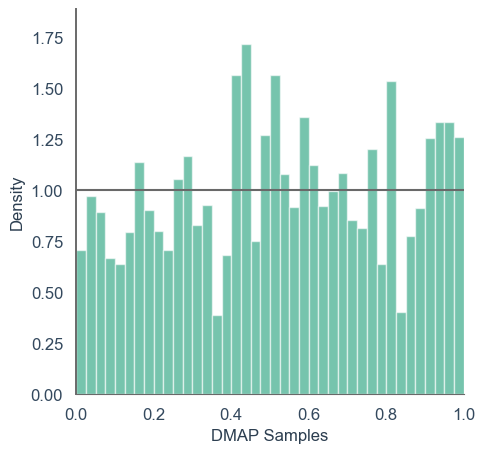

In [8]:
dmap.plot()

Finally, you may wish to perform a statistical chi-squared test to assess the feasibility your observed samples are drawn from a uniform distribution, as would be expected for text draw via pure sampling from the evaluator model itself.

In [9]:
dmap.chi_squared_uniformity_test()

14:12:31 | INFO | Running Chi-squared test at significance level alpha=0.05
14:12:31 | INFO | Null hypothesis: the DMAP sample density is uniform
14:12:31 | INFO | Generated 222 points for Chi-squared test
14:12:31 | INFO | Chi-squared test statistic: 3.4054054054054053
14:12:31 | INFO | Chi-squared test p-value: 0.3332395394706321
14:12:31 | INFO | A p-value of 0.3332395394706321 is not significant at level 0.05


0.3332395394706321

This concludes your interactive demo! We hope you find DMAP useful and find many new applications! Please report any issues and we will endeavour to fix them as soon as possible.